In [3]:
#utf-8
import pandas as pd   

df = pd.read_csv("C:/Users/Administrator/Desktop/groupchat/groupchat_v1.csv", engine='python', delimiter='\\t', encoding='utf-8')

cut = []
cut.append(0)
df_li = []

for i in range(1,6):
    cut.append(int(round(0.2*i*df.shape[0])))

tmp = 0
for i in range(0,4):
    df_li.append(df.iloc[cut[i]:cut[i+1]])
    tmp = i+1

df_li.append(df.iloc[cut[tmp]:])

for i in range(len(df_li)):
    name = "C:/Users/Administrator/Desktop/groupchat_v1" + str(i) +  ".csv"
    df_li[i].to_csv(name,encoding='utf_8_sig')
print(1)

1


In [8]:
#utf-8
import pandas as pd

file = pd.read_csv("C:/Users/Administrator/Desktop/groupchat_v14.csv", sep='\\001', header=None, encoding='utf-8', names=['application','authaccount','from_id','to_id','content','capture_time','username','password','groupnum','data_source','action'])
df = pd.DataFrame(file)

reverseKey = ['手机屏幕','美国','日本','欧洲','企业支付宝','朋友圈','开户许可证','出门','南非','耐抗','验证码','校验码','注册','额度','短信通道','106','自己','资金周转',
              '资金提现','福利','待遇','招聘','包吃住','体检报告','个人照片','复印件','片名','完成目录查找','游戏','卡.盟','企业系统','带圈','数据线','额度','服务器','绑卡',
              '辅助','按揭','解封','花呗','url','URL', '@', '106短信','代取','兼职','招聘','征信','买家','卖家','硬改','耐操','快捷免密','除了','点击','短信通道','布料','纯白','除非','群发','http',
              "一单","卷子","复习","四六级","单子","资料很准","@","日结",'工资','民生','浦发','面试','老师','支付宝搜索','兼/职','暑假工','金凤','网*赚','年审','好评',
            '全区','一区','大区','急需用钱','教育','课程','钉钉','皮肤','代理','运营','培训','学习','通缉','app','APP','网盘','扫码','和平精英','提现','代取','为准',
            '百信','订单','退款','白银','办证','中信','帮我','绑定','报考','本次','必须','毕竟','毕业','编号','临时工','直充','交友粉','欢迎','填单','java','记得',
            '怒海争锋','补单','设计','防沉迷','战力','接口','英国','劫持','截止','全服','开奖','距离','距離','卡盟','绝地求生','卡奥斯','考试','聘','频道','拼多多',
            '头像','高考','同学们','唯一','为什么','为啥','温馨提示','我发现','我感觉','我刚才','逾期','一直','已清空','黑名单','白名单','中了',
            '坐高铁','司机','驱动','天书','礼包','礼金','长按复制','失物','送分','小任务','日更','稿','感谢','放款','写','支付宝：','华夏','骗子',
            '请发','透视','衣服','投诉','联系人','原始资料','sql','洗数据条','小说','网红爆款','查支付宝','查银行卡','回支付宝','改装','宝箱',
            '森林','秀姐','话费','党','校车',"群资料",'高铁站','4G','4g','高铁北站','佣金','盖帽','晶晶','5G','5g','资料卡','推荐','恭喜','pay',
            '还是支付宝','或者支付宝','俺','家具','钓具','道具','0188','竞猜','经验值','以下名单','上分','下分','抖音关注','代挂','系统升级','0868',
            'VIP等级','等级查询','传奇版本','封磐線','飞马','有事问群主','神雕','花开','悟空','飞哥','裂变','浏览器','银行卡查','支付宝查','加急','优惠力度',
            '高铁票','车找人','测试娱乐','降低金额','施工','账户明细','香水','安卓','暗杀','二级','安全员','月租','冻结','皇冠','在线接','平安']

keys = ["业主","车主","车辆","储户","信用卡","社工","股民","名单","数","名录","目录","资料","航班","高铁","支付宝","买家","卖家","银行卡","短信","通讯录","联系人",
        "IMSI","IMEI","个人信息","车档","身份证","户籍","机主","基站","四大件","洗料","冷","热",'永久黑','普黑','出','收',"黑","不在线", "滴滴","资源","精准",'换群','BC',
        'SSC','QP','CP','JR','QP','1','2','3','4','5','6','7','8','9','0','裸贷','裸条','售','据']


def del_other(x):
    try:
        k = int(x)
        if k==13 or k==1:
            return 1
        else:
            return 0
    except:
        return 0

def anti_class(x):
    if type(x) != str:
        return 1
    if x == "\\N":
        return 1
    for i in reverseKey:
        try:
            if i in x:
                return 1
        except:
            return 0
    return 0

def key_filter(x):
    tmp = 0
    for i in keys:
        if i in x:
            tmp += 1
    if tmp>1:
        return 1
    else:
        return 0

df.drop(['password'], axis=1, inplace=True)
df['isother'] = df['action'].apply(del_other)
df = df.loc[df.isother>0,]
df.drop(['isother'], axis=1, inplace=True)
df['len_content']=df['content'].str.len()
df = df.loc[df.len_content>2,]
df.drop(['len_content'], axis=1, inplace=True)
df['anti_class'] = df['content'].apply(anti_class)
df = df.loc[df.anti_class<1,]
df.drop(['anti_class'], axis=1, inplace=True)
df['key_count'] = df['content'].apply(key_filter)
df = df.loc[df.key_count>0,]
df.drop(['key_count'], axis=1, inplace=True)


writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/groupchat_v14.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
df.to_excel(writer, 'Sheet1')
writer.save()
print(1)

d:\python35\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


1


In [7]:
#utf-8
import pandas as pd
import time

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx',sheet_name='Sheet1', names=['application','authaccount','from_id','to_id','content','username','groupnum','data_source','action','time'])
df = pd.DataFrame(file)

reverseKey = ['区服','精炼']

def anti_class(x):
    for i in reverseKey:
        try:
            if i in x:
                return 1
        except:
            return 0
    return 0

df['anti_class'] = df['content'].apply(anti_class)
df = df.loc[df.anti_class<1,]
df.drop(['anti_class'], axis=1, inplace=True)


writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/groupchat1.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
df.to_excel(writer, 'Sheet1')
writer.save()
print(1)

1


In [3]:
#utf-8
import pandas as pd
import time

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx',sheet_name='Sheet1', names=['application','authaccount',
                                                'from_id','to_id','content','username','groupnum','data_source','action','time'])
df = pd.DataFrame(file)

keys = ["业主","车主","车辆","储户","信用卡","社工","股民","名单","数","名录","目录","资料","航班","高铁","支付宝","买家","卖家","银行卡","短信","通讯录","联系人",
        "IMSI","IMEI","个人信息","车档","身份证","户籍","机主","基站","四大件","洗料","冷","热",'永久黑','普黑','出','收',"黑","不在线", "滴滴","资源","精准",'换群','BC',
        'SSC','QP','CP','JR','QP','裸贷','裸条','售','据','DD','菠菜','网贷','wd','WD','换群','个','2']

def key_filter(x):
    tmp = 0
    for i in keys:
        if i in x:
            tmp += 1
    if tmp>2:
        return 1
    else:
        return 0

def reverse_identity(x):
    origin = str(x)
    newstr = origin[:6] + "19" + origin[6:]
    w = [7, 9, 10, 5, 8, 4, 2, 1, 6, 3, 7, 9, 10, 5, 8, 4, 2]
    last = ["1", "0", "X", "9", "8", "7", "6", "5", "4", "3", "2"]
    ws = 0
    for i in range(len(newstr)):
        ws += int(newstr[i]) * w[i]
    return newstr + last[ws%11]

df['key_count'] = df['content'].apply(key_filter)
df = df.loc[df.key_count>0,]
df.drop(['key_count'], axis=1, inplace=True)
# df['identity'] = df['authaccount'].apply(reverse_identity)
# df.drop(['authaccount'], axis=1, inplace=True)
   
writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/groupchat1.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
df.to_excel(writer, 'Sheet1')
writer.save()
print(1)

1


In [12]:
#utf-8
import csv
import openpyxl
import re
import time
import pandas as pd
  
# file = pd.read_excel('C://Users/Administrator/Desktop/groupchat/groupchat.xlsx',sheet_name='Sheet1', names=['application','authaccount',
#                                                 'from_id', 'to_id', 'content', 'time', 'username','groupnum', 'data_source', 'action'])

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx',sheet_name='Sheet1', names=['application','authaccount',
                                                'from_id', 'to_id', 'content', 'username','groupnum', 'data_source', 'action','time'])

df = pd.DataFrame(file)

df1 = df['from_id'].drop_duplicates(keep='last')
df2 = df['to_id'].drop_duplicates(keep='last')
df_union = pd.concat([df1,df2],axis=0).drop_duplicates(keep='last')
print(df1.shape)
print(df2.shape)
print(df_union.shape)

# file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx',sheet_name='Sheet1', names=['application','authaccount',
#                                                 'from_id', 'to_id', 'content', 'username','groupnum', 'data_source', 'action','time'])
# df = pd.DataFrame(file)

# df['content'].to_csv('C://Users/Administrator/Desktop/wordclound.txt', index=False)
# print(1)

(27385,)
(18562,)
(45260,)


数据 0.5435561514080558
永久黑 0.12540122828488087
冷热 0.090879697810056
普黑 0.07733548723973653
短信 0.045956763956758254
支付宝 0.044422148152301257
换群 0.02890016202618248
QQ 0.028444781532963346
冷黑 0.02814119453748392
资源 0.025621574631948706
永久 0.025315389946740506
身份证 0.02303942061806228
银行卡 0.020700027095786666
股民 0.02000125723468198
资料 0.019029857629666233
二手 0.017453342456067094
黑号 0.016076911325823364
出普黑 0.01398480094393256
残卡 0.012321672186088761
出普 0.012275474165037546
裸贷 0.011760696216181131
视频 0.011675999053617743
密正 0.010625544841779811
通讯录 0.009823789285774145
四件套 0.009760981876392757
电销 0.009741182724513665
手机卡 0.00967208304084021
小冷 0.009411196859862117
白号 0.008216648029823519
邮箱 0.008211040049950701
网销 0.007721669232846198
出冷 0.006903304288510361
客户 0.006808061171042163
肉偿 0.006791109094528835
网贷 0.006289530580258484
bc 0.005926546129141783
信用卡 0.005653300031896439
qq 0.0054975645050947715
网银 0.005226976096080503
法人 0.005006068521625903
霸屏 0.005002585708117451
贷款 0.00471699637902

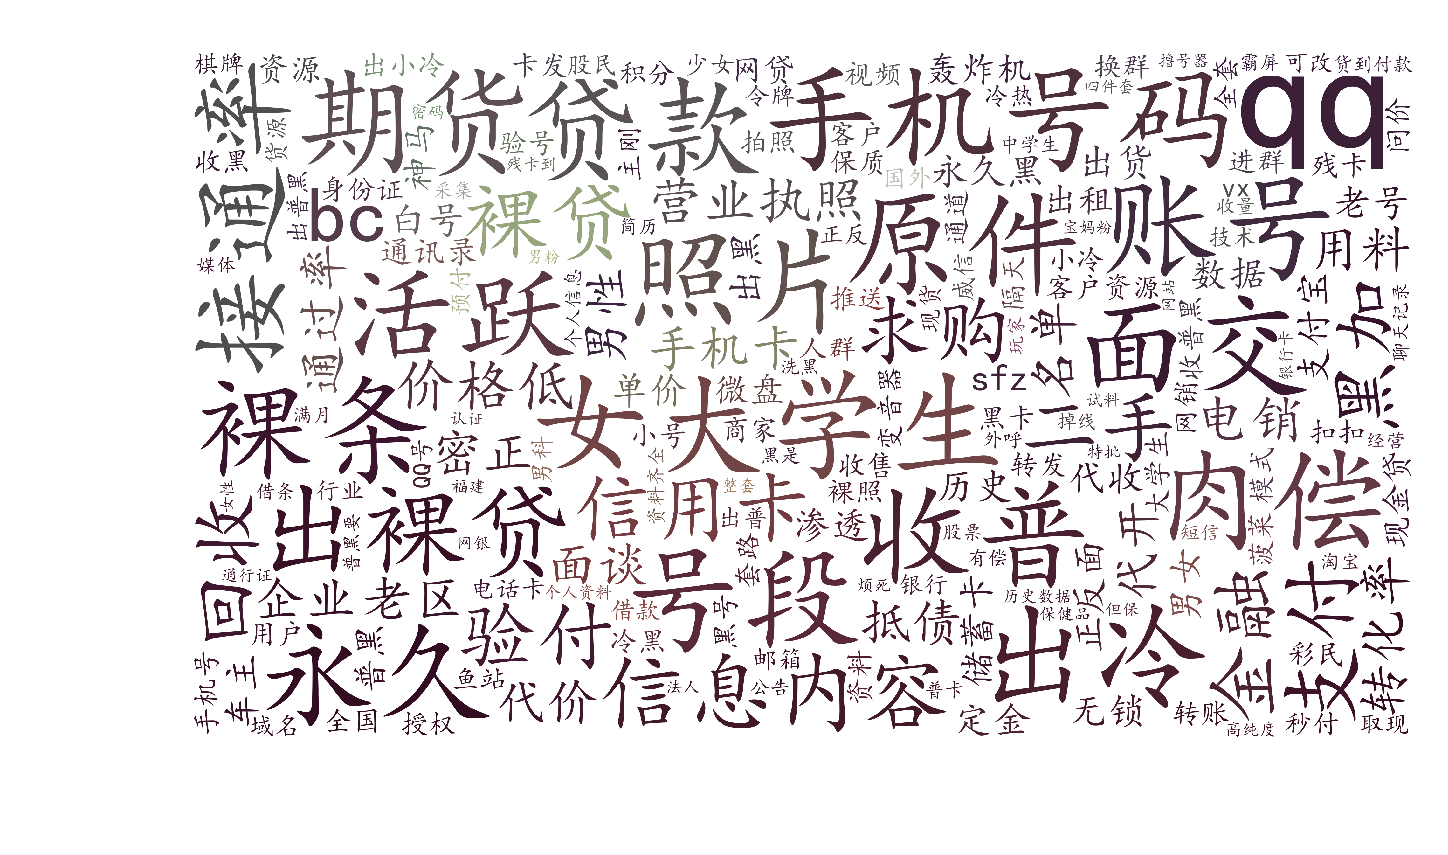

In [7]:
#utf-8
import importlib
import sys
import jieba.analyse
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

plt.rcParams['figure.figsize'] = (4.5,4.5)
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.dpi'] = 350

importlib.reload(sys)

file = open('C://Users/Administrator.SC-201905252025/Desktop/wordclound.txt', "r", encoding="UTF-8")
stop = [line.strip() for line in open("C://Users/Administrator.SC-201905252025/Desktop/stopword.txt", 'r', encoding="UTF-8").readlines()]
text = file.read()
jieba.add_word("女大学生")
jieba.add_word("永久黑")
jieba.add_word("密正")
jieba.add_word("撸号器")
jieba.add_word("现金贷")
jieba.add_word("微信")

jieba.del_word("结眇")
cut_text = ""
tags = jieba.analyse.extract_tags(text, topK=800, withWeight=True)
for item in tags:
    if item[0] not in stop:
        print(item[0],item[1])
        cut_text += item[0]
        cut_text += " "

back_pic = np.array(Image.open("C:/Users/Administrator.SC-201905252025/Desktop/1.jpeg"))
cloud = WordCloud(background_color='white',mask=back_pic, max_words=3000,max_font_size=500,
                   font_path="C://Windows/Fonts/simkai.ttf", random_state=42)
cloud.generate(cut_text)
image_colors = ImageColorGenerator(back_pic)
plt.figure()
plt.imshow(cloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
cloud.to_file("C://Users/Administrator.SC-201905252025/Desktop/cloud1.jpg")

In [37]:
#utf-8
import jieba
import pandas as pd

keywords_file = r"C://Users/Administrator/Desktop/qg_keywords.txt"
# jieba.load_userdict(keywords_file)
keyword = list(pd.read_table(keywords_file, header=None, encoding='utf-8')[0])
# print(keyword)

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx',sheet_name='Sheet1', names=['application','authaccount',
                                                'from_id', 'to_id', 'content', 'username','groupnum', 'data_source', 'action','time'])
df = pd.DataFrame(file)

def keyword_count(content):
    words=list(jieba.cut(content,cut_all=True))
    count_dict,key_list={},[]
    for i in keyword:
        a=words.count(i)
        if a>0:
            count_dict[i]=a
            key_list.append(i+'('+str(a)+')')
    return [len(count_dict),sum(count_dict.values()),';'.join(key_list)]

df['result'] = df['content'].apply(keyword_count)
df['word_types'] = df['result'].apply(lambda x:x[0])
df['word_counts'] = df['result'].apply(lambda x:x[1])
df['keywords'] = df['result'].apply(lambda x:x[2])
df = df.sort_values(by=['word_types','word_counts'], ascending=False)
df = df.loc[df.word_types>2,]

writer = pd.ExcelWriter("C://Users/Administrator/Desktop/groupchat_selected.xlsx")
df.to_excel(writer, 'Sheet1')
writer.save()

print(1)

1


In [14]:
#utf-8
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

"""
在本地有私聊记录的账号
的所有聊天内容
"""

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx',  sheet_name="Sheet2", names=[ 'application','authaccount',
                                                'from_id', 'to_id', 'content', 'username', 'action','time'])
df = pd.DataFrame(file)
df1 = df[['application', 'username']]
df1 = df1.rename(columns={'username':'from_id'})

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx',  sheet_name="Sheet1", names=['application','authaccount',
                                                'from_id', 'to_id', 'content', 'username','groupnum', 'data_source', 'action','time'])
df = pd.DataFrame(file)
df2 = pd.merge(df1,df,on=['from_id'])

df1 = df1.rename(columns={'from_id':'to_id'})
df3 = pd.merge(df1,df,on=['to_id'])

df = pd.merge(df2,df3,how='outer')
df.drop_duplicates(keep='first',inplace=True)

writer = pd.ExcelWriter("C://Users/Administrator/Desktop/groupchat_tmp.xlsx")
df.to_excel(writer, 'Sheet1')
writer.save()

print(1)

1


In [2]:
#utf-8
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 各群体包含的有私聊记录的账号和好友数


file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx',  sheet_name="Sheet2", names=[ 'application','authaccount',
                                                'from_id', 'to_id', 'content', 'username', 'action','time'])
df = pd.DataFrame(file)
li_user = set(df['username'].tolist())


file = pd.read_excel('C://Users/Administrator/Desktop/groupchat_tmp.xlsx',  sheet_name="5and7", names=['from_id', 'to_id'])
df = pd.DataFrame(file)
li1 = df['from_id'].tolist()
li2 = df['to_id'].tolist()
li1 += li2
li1 = set(li1)

k = li_user & li1
m = li1 - k
print(len(k))
print(len(m))

514
7064


In [ ]:
#utf-8
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout

plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat_tmp.xlsx',  sheet_name="Sheet5", names=['from_id', 'to_id'])
df = pd.DataFrame(file)

DG = nx.from_pandas_edgelist(df, source='from_id', target='to_id')
DG.add_nodes_from(df['from_id'].tolist(), color='Brown')
DG.add_nodes_from(df['to_id'].tolist(), color='Brown')
pos = nx.kamada_kawai_layout(DG)
node_color = [DG.node[v]['color'] for v in DG]
nx.draw_networkx(DG, node_color=node_color, node_size=2,font_size=2, width=0.4, edge_color='Tan', alpha = 0.9, with_labels=False)
print("团体数: ",len(list(nx.connected_component_subgraphs(DG))))

GC = max(nx.connected_component_subgraphs(DG),key=len)
print("最大子团体成员数: ",GC.number_of_nodes())
with open('C://Users/Administrator/Desktop/三类最大子团体.txt', 'w') as p:
    for x in nx.degree(GC):
        p.write(str(x[0]))
        p.write("\n")


ax = plt.gca()
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("C://Users/Administrator/Desktop/四大件.png", format="PNG")
plt.show()


def circulate_del(GC):
    ret = 0
    lst = []
    for x in nx.degree(GC):
        if x[1]<2:
            lst.append(x[0])
    for i in range(len(lst)):
        GC.remove_node(lst[i])
        ret += 1
    return ret

while(circulate_del(DG) > 0):
    circulate_del(DG)
    
with open('C://Users/Administrator/Desktop/三类拔点后.txt', 'w') as p:
    for x in nx.degree(DG):
        p.write(str(x[0]))
        p.write("\n")

print("拔点后团体数: ", len(list(nx.connected_component_subgraphs(DG))))
print("拔点后成员数: ",DG.number_of_nodes())
pos = nx.kamada_kawai_layout(DG)
node_color = [DG.node[v]['color'] for v in DG]
nx.draw_networkx(DG, node_color=node_color, node_size=6,font_size=6, width=0.5, edge_color='Tan', alpha = 0.9, with_labels=True)

ax = plt.gca()
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("C://Users/Administrator/Desktop/四大件拔点后.png", format="PNG")
plt.show()

团体数:  164
最大子团体成员数:  7152


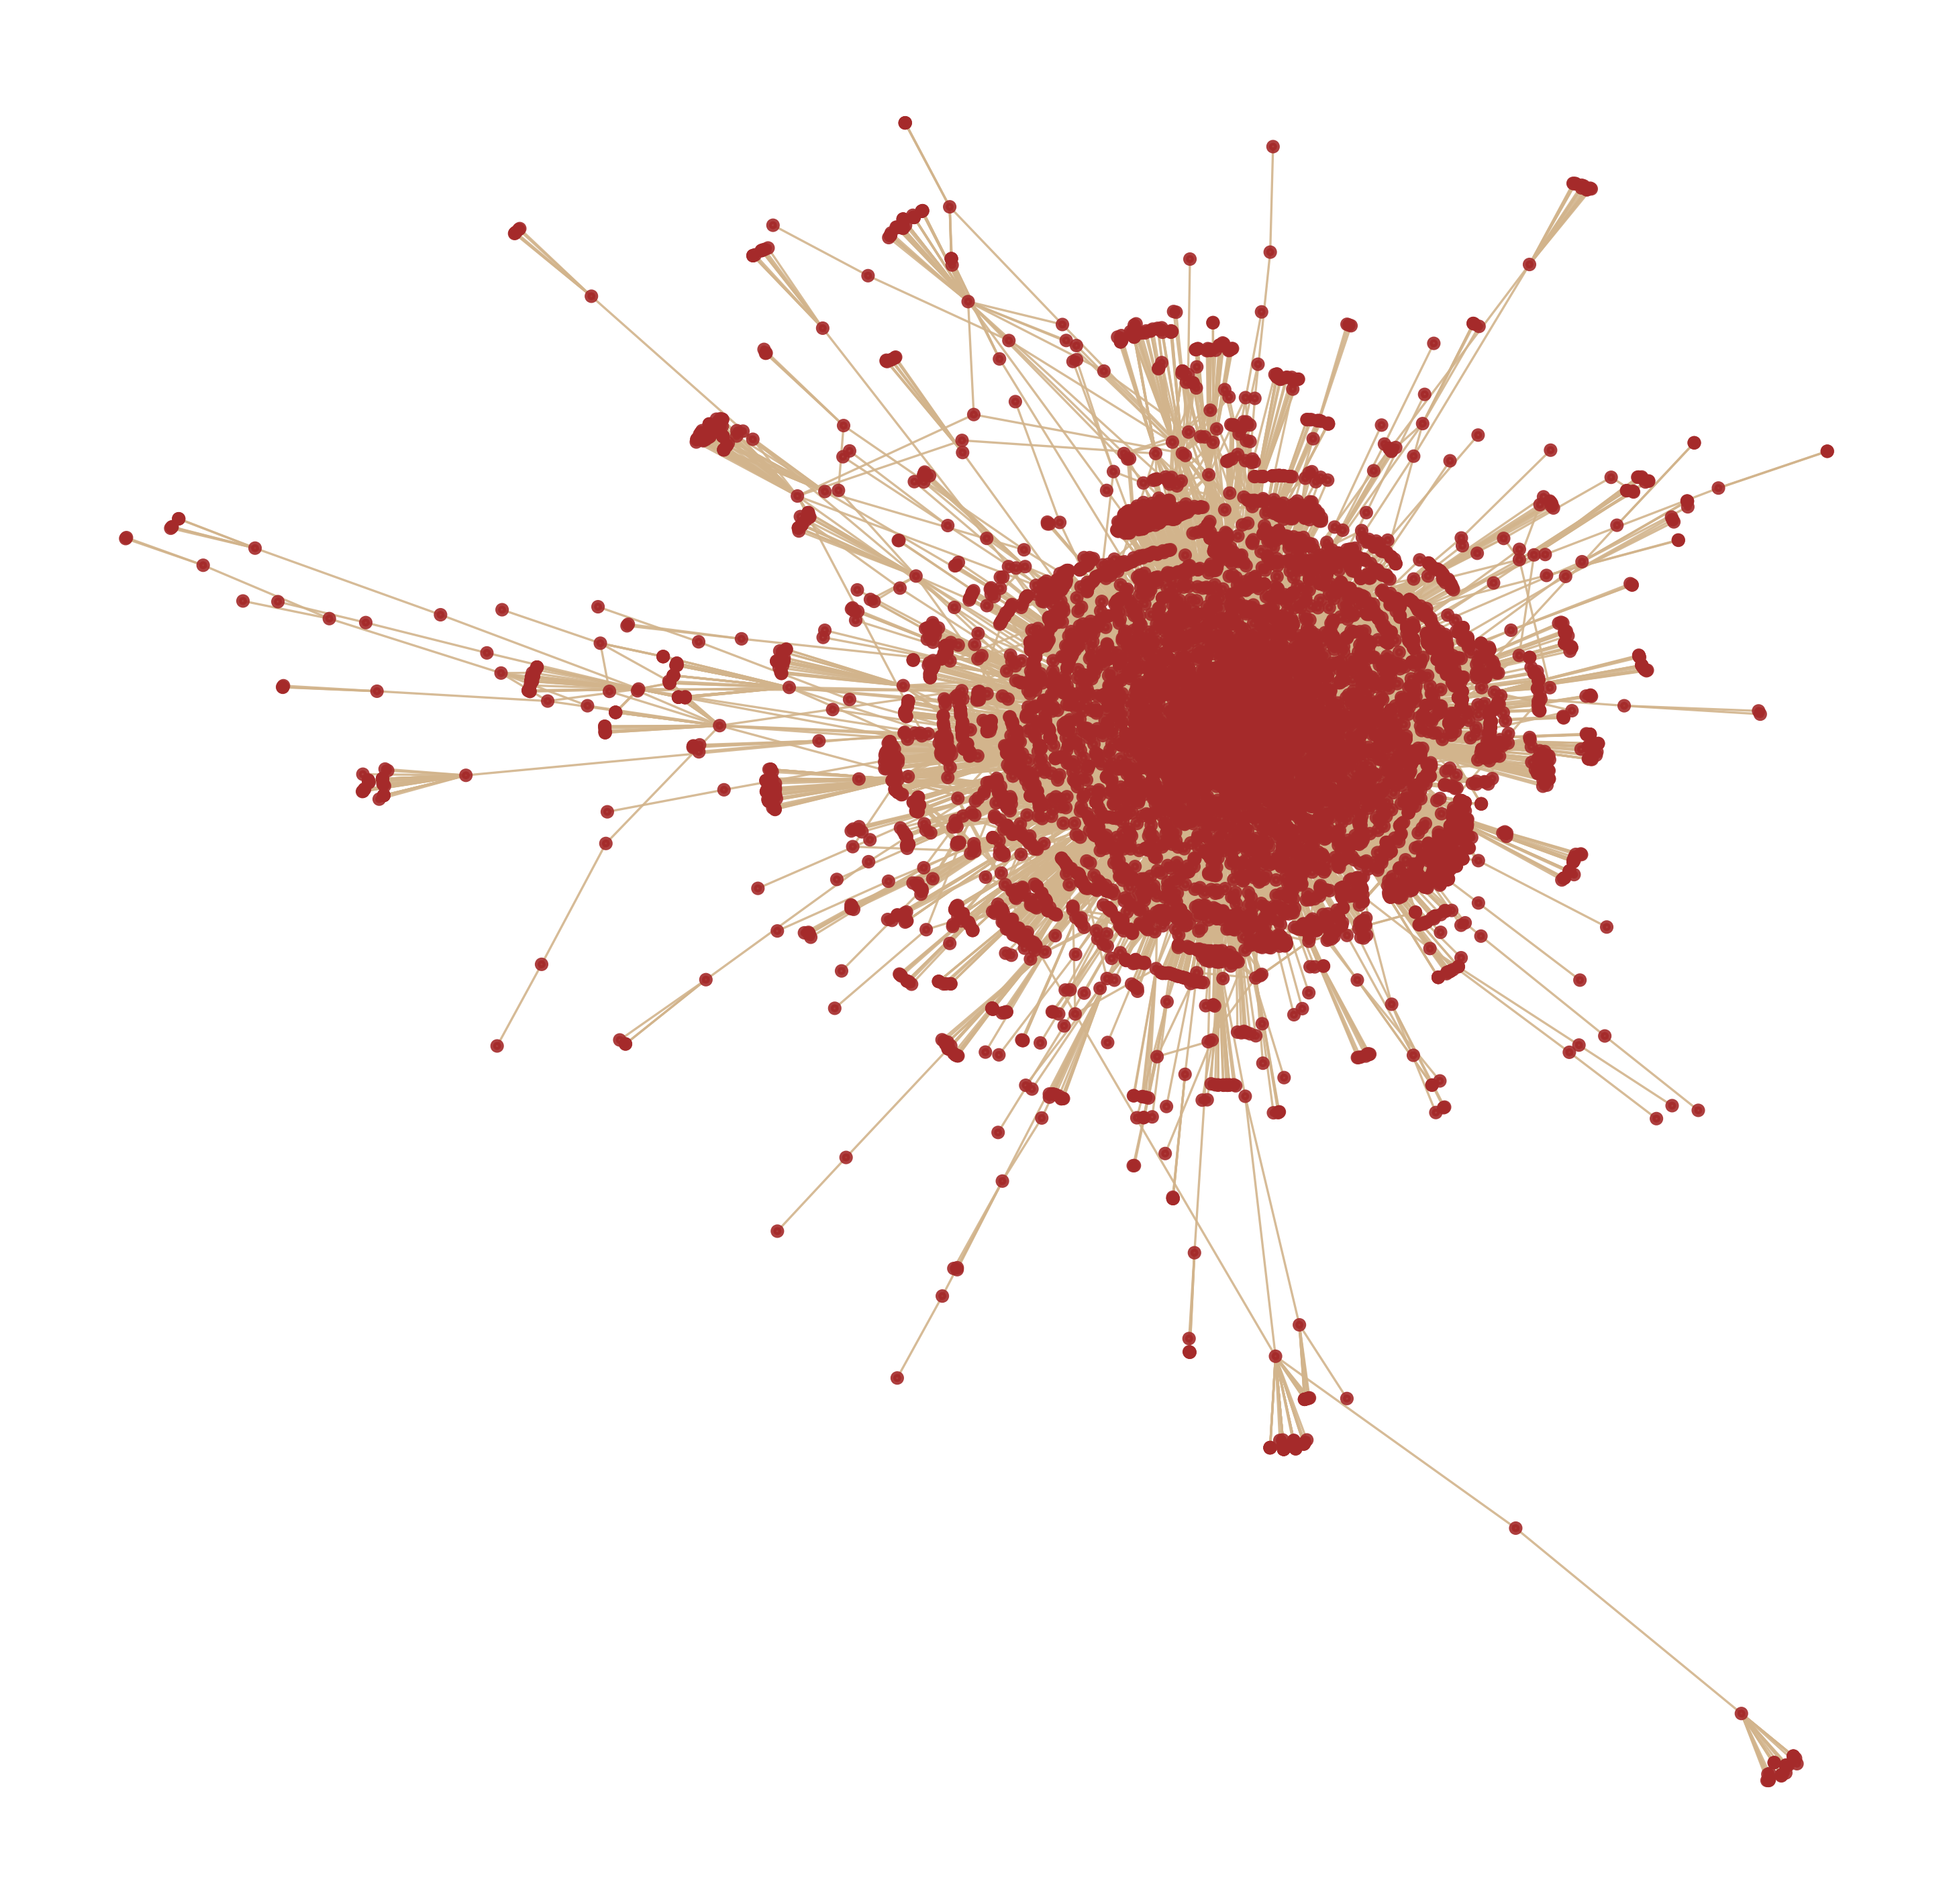

拔点后最大子团伙成员数:  3801


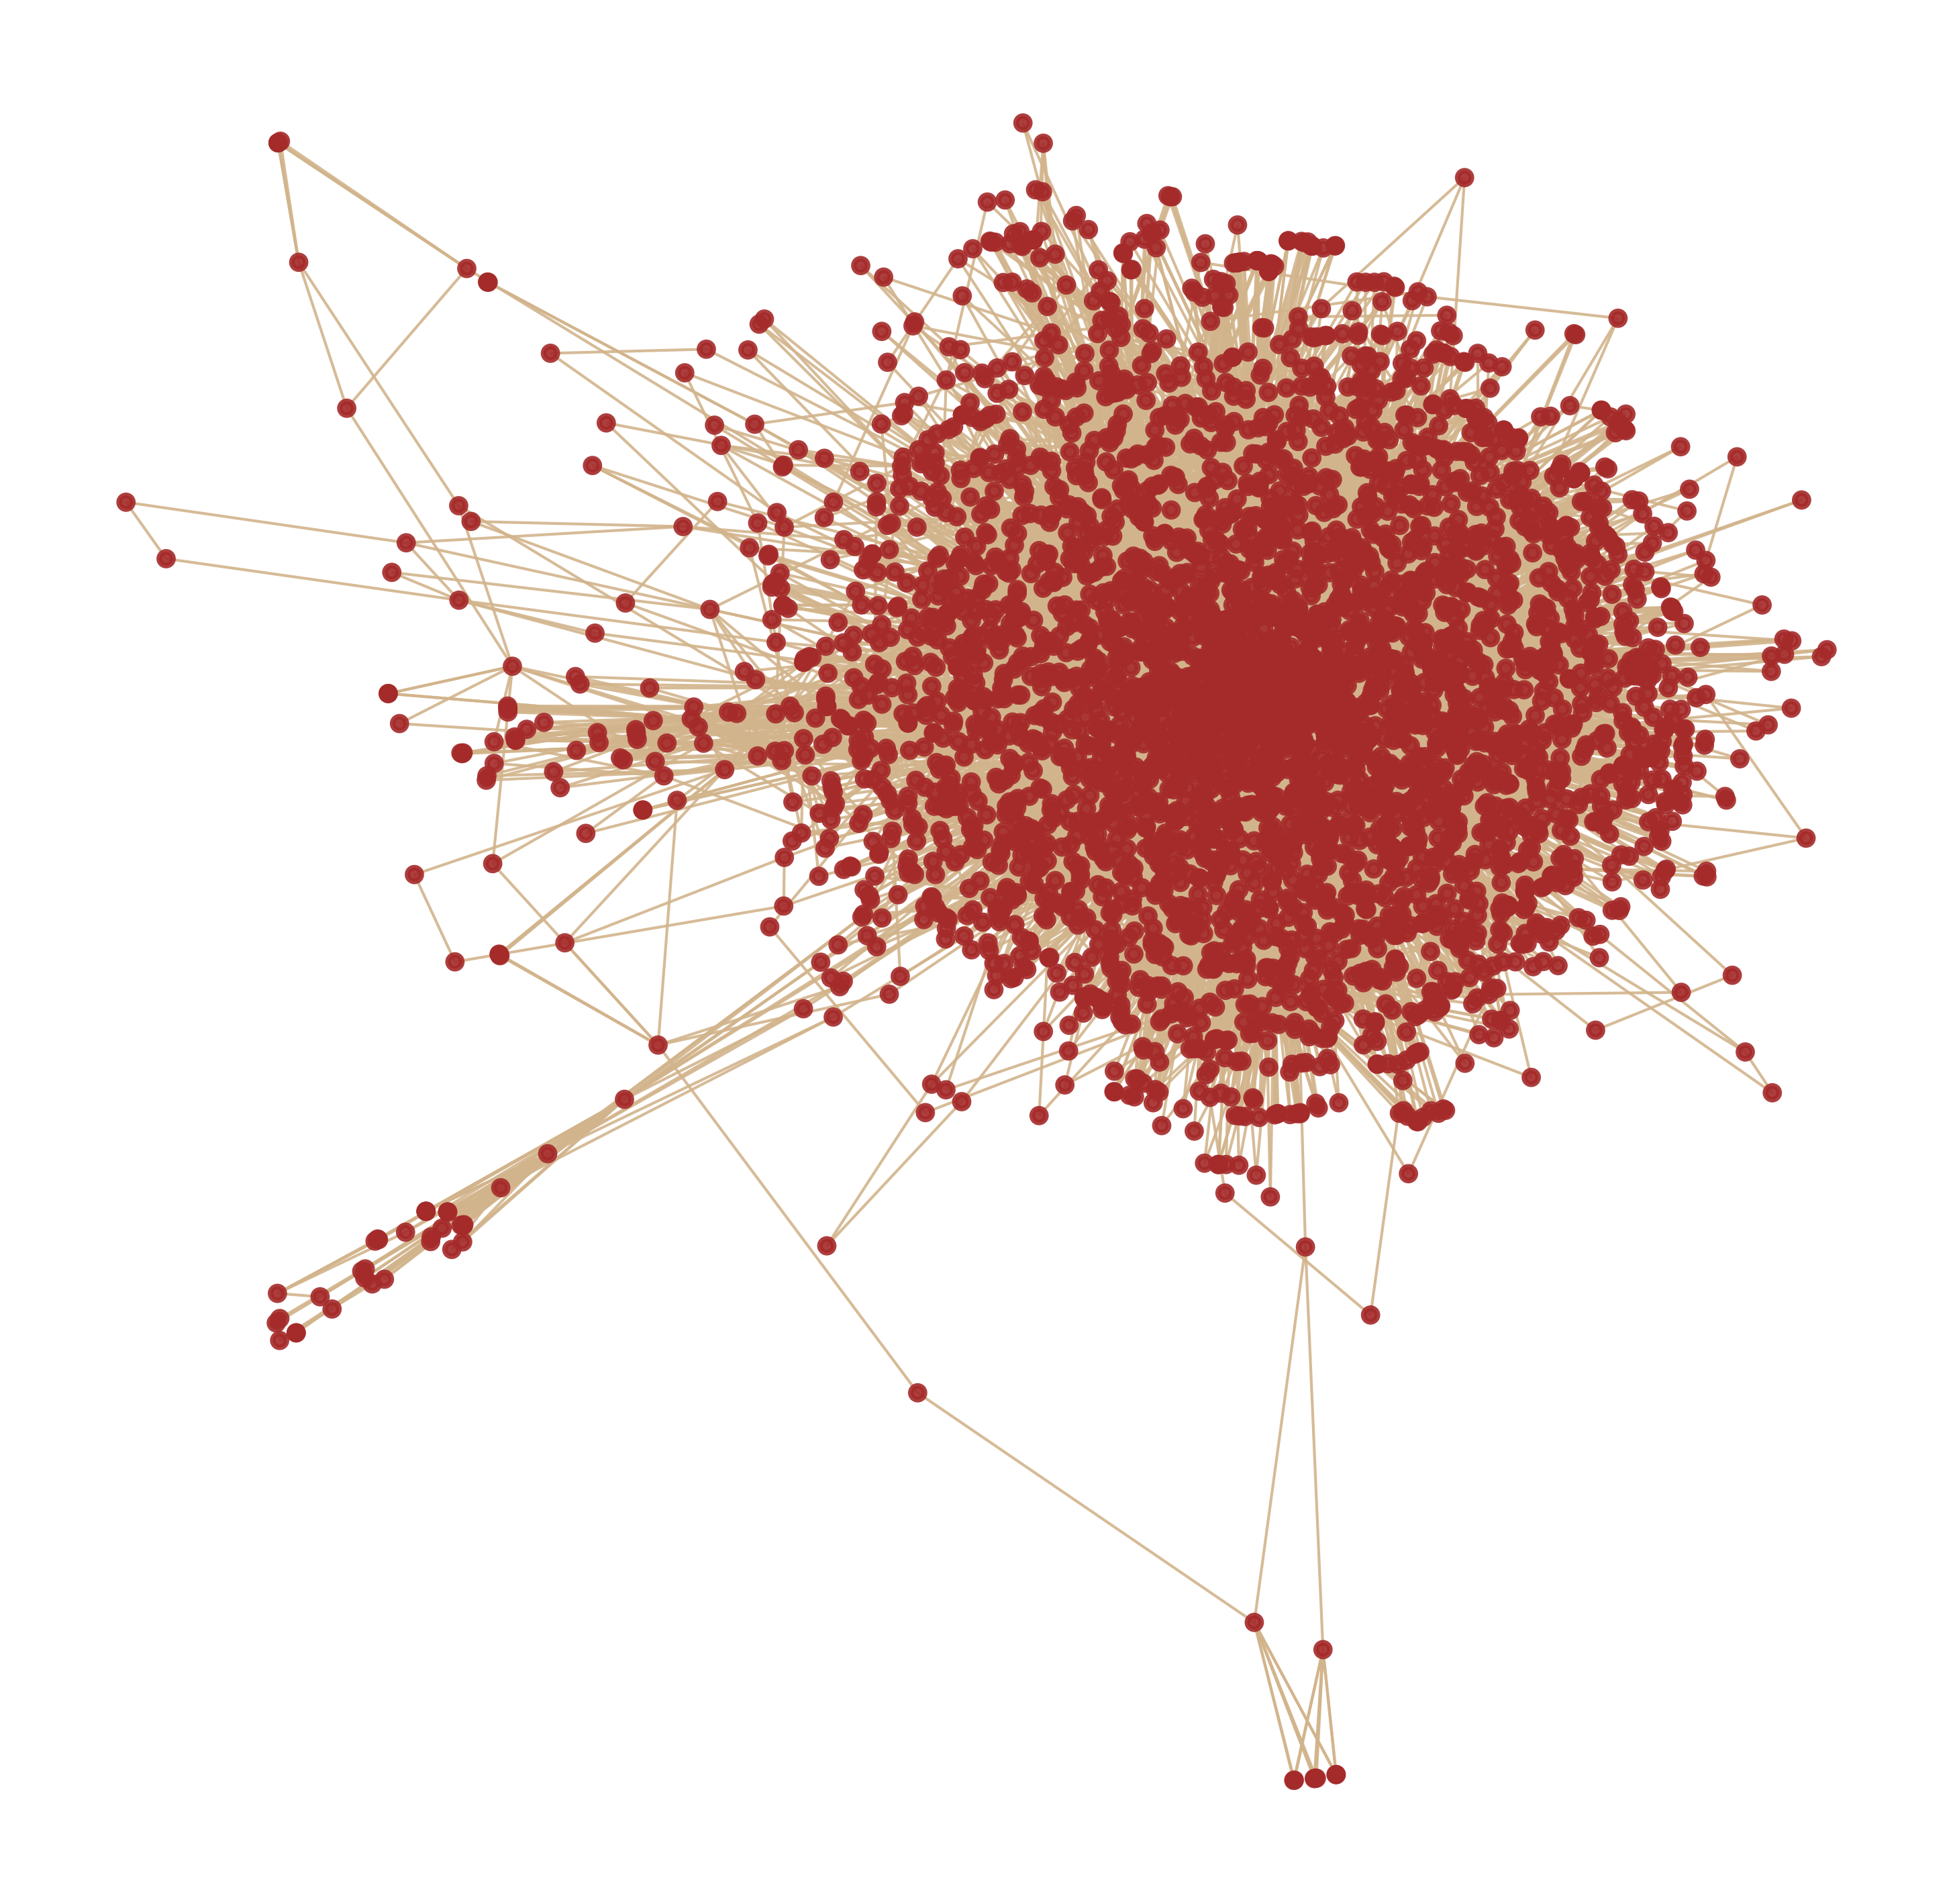

In [30]:
#utf-8
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat_tmp.xlsx',  sheet_name="5and7", names=['from_id', 'to_id'])
df = pd.DataFrame(file)

DG = nx.from_pandas_edgelist(df, source='from_id', target='to_id')
DG.add_nodes_from(df['from_id'].tolist(), color='Brown')
DG.add_nodes_from(df['to_id'].tolist(), color='Brown')


print("团体数: ",len(list(nx.connected_component_subgraphs(DG))))

GC = max(nx.connected_component_subgraphs(DG),key=len)
pos = nx.kamada_kawai_layout(GC)
node_color = [GC.node[v]['color'] for v in GC]
nx.draw_networkx(GC, node_color=node_color, node_size=2,font_size=2, width=0.4, edge_color='Tan', alpha = 0.9, with_labels=False)

print("最大子团体成员数: ",GC.number_of_nodes())
with open('C://Users/Administrator/Desktop/三类最大子团体.txt', 'w') as p:
    for x in nx.degree(GC):
        p.write(str(x[0]))
        p.write("\n")

ax = plt.gca()
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("C://Users/Administrator/Desktop/四大件.png", format="PNG")
plt.show()


def circulate_del(GC):
    ret = 0
    lst = []
    for x in nx.degree(GC):
        if x[1]<2:
            lst.append(x[0])
    for i in range(len(lst)):
        GC.remove_node(lst[i])
        ret += 1
    return ret

while(circulate_del(GC) > 0):
    circulate_del(GC)
    
with open('C://Users/Administrator/Desktop/三类最大子团伙拔点后.txt', 'w') as p:
    for x in nx.degree(GC):
        p.write(str(x[0]))
        p.write("\n")

# print("拔点后团体数: ", len(list(nx.connected_component_subgraphs(DG))))
print("拔点后最大子团伙成员数: ",GC.number_of_nodes())
pos = nx.kamada_kawai_layout(GC)
node_color = [GC.node[v]['color'] for v in GC]
nx.draw_networkx(GC, node_color=node_color, node_size=6,font_size=6, width=0.5, edge_color='Tan', alpha = 0.9, with_labels=False)

ax = plt.gca()
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("C://Users/Administrator/Desktop/四大件拔点后.png", format="PNG")
plt.show()

In [2]:
#utf-8
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

li = []
with open('C://Users/Administrator/Desktop/二类最大子团体.txt', 'r') as p:
    for line in p.readlines():
        li.append(line.strip())

# print(type(li[0]))

# file = pd.read_excel('C://Users/Administrator/Desktop/groupchat/groupchat.xlsx', sheet_name="Sheet1", names=['application','authaccount',
#                                                 'from_id', 'to_id', 'content', 'capture_time','username','groupnum', 'data_source', 'action'])
# file = pd.read_excel('C://Users/Administrator/Desktop/groupchat.xlsx', sheet_name="Sheet1", names=['application','authaccount',
#                                                 'from_id', 'to_id', 'content', 'username','groupnum', 'data_source', 'action','time'])
file = pd.read_excel('C://Users/Administrator/Desktop/groupchat_tmp.xlsx', sheet_name="Sheet1", names=[
                         'from_id', 'to_id', 'authaccount','content', 'username','groupnum', 'action','time'])
df = pd.DataFrame(file)


df1 = df.loc[df['from_id'].isin(li)]
df2 = df.loc[df['to_id'].isin(li)]

df = pd.merge(df1,df2,how='outer')
df.drop_duplicates(keep='first',inplace=True)

writer = pd.ExcelWriter("C://Users/Administrator/Desktop/groupchat_subgroup2.xlsx")
df.to_excel(writer, 'Sheet1')
writer.save()

print(1)

1


In [29]:
#utf-8
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

file = pd.read_excel('C://Users/Administrator/Desktop/groupchat_subgroup.xlsx', sheet_name="Sheet1", names=['application','authaccount',
                                                'from_id', 'to_id', 'content', 'capture_time','username','groupnum', 'data_source', 'action'])
df = pd.DataFrame(file)
df = df[['authaccount', 'from_id','to_id','username','capture_time']]

def switchtime(x):
    timeArray = time.localtime(int(x))
    return time.strftime("%Y-%m-%d %H:%M:%S", timeArray)

def reverse_identity(x):
    try:
        origin = str(x)
        newstr = origin[:6] + "19" + origin[6:]
        w = [7, 9, 10, 5, 8, 4, 2, 1, 6, 3, 7, 9, 10, 5, 8, 4, 2]
        last = ["1", "0", "X", "9", "8", "7", "6", "5", "4", "3", "2"]
        ws = 0
        for i in range(len(newstr)):
            ws += int(newstr[i]) * w[i]
        return newstr + last[ws%11]
    except:
        return 0

df['time'] = df['capture_time'].apply(switchtime)
df['sfz'] = df['authaccount'].apply(reverse_identity)
df.drop(['capture_time', 'authaccount'], axis=1, inplace=True)

df1 = df.groupby(['sfz','from_id','to_id','username']).size().reset_index(name='次数')
df2 = df.groupby(['sfz','from_id','to_id','username'])['time'].agg([np.min, np.max]).reset_index()
df3 = pd.merge(df1,df2,how='inner')

writer = pd.ExcelWriter("C://Users/Administrator/Desktop/groupchat_agg.xlsx")
df3.to_excel(writer, 'Sheet1')
writer.save()

print(1)

1


from_id    int64
to_id      int64
dtype: object


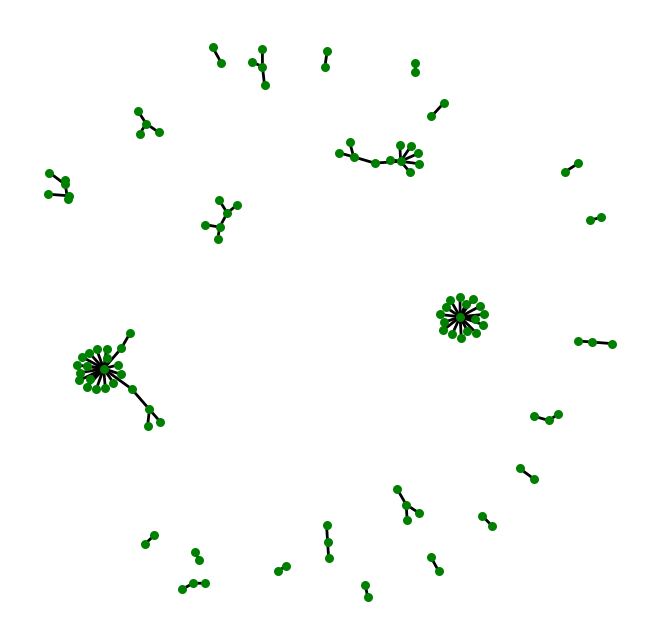

1


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200

# file = pd.read_excel('C://Users/Administrator/Desktop/private2_1.xlsx',  sheet_name="Sheet1", names=[ 'application',
#         'authaccount','from_id','to_id','content','capture_time','username','datasource','newtime'])
file = pd.read_excel('C://Users/Administrator/Desktop/private.xlsx',  sheet_name="Sheet4", names=[ 'from_id',
        'to_id'])
df = pd.DataFrame(file)

# df['origin'] = df['origin'].dropna().astype('int64')
# df['friend'] = df['friend'].dropna().astype('int64')

def del_non(x):
    if x == '\\N':
        return 0
    return 1

# df['newfromid'] = df['from_id'].apply(del_non)
# df = df.loc[df.newfromid>0,]
# df['newtoid'] = df['to_id'].apply(del_non)
# df = df.loc[df.newtoid>0,]

# df['to_id'] = df['to_id'].apply(pd.to_numeric)
# print(df.dtypes)

DG = nx.from_pandas_edgelist(df, source='from_id', target='to_id')

# print(DG.number_of_nodes())
pos = nx.spring_layout(DG,scale=89)
nx.draw_networkx_edges(DG, pos)
DG.add_nodes_from(df['from_id'])
DG.add_nodes_from(df['to_id'])
nx.draw_networkx_nodes(DG, pos, node_size=5, node_color='green')


ax = plt.gca()
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
# plt.savefig("C://Users/Administrator/Desktop/relationship.png", format="PNG")
plt.show()

# print(nx.connected_component_subgraphs(DG))
GC = max(nx.connected_component_subgraphs(DG),key=len)
# print(nx.connected_component_subgraphs(DG))

tmp = 0
for i in sorted(nx.connected_component_subgraphs(DG), key=len, reverse=True):
    if tmp == 3:
        GC = i
        break
    tmp += 1

def circulate_del(GC):
    ret = 0
    lst = []
    for x in nx.degree(GC):
        if x[1]<2:
            lst.append(x[0])
    for i in range(len(lst)):
        GC.remove_node(lst[i])
        ret += 1
    return ret

# while(circulate_del(GC) > 0):
#     circulate_del(GC)

# print(nx.degree(DG))
# print(nx.degree(GC))

GCgroup = []
for x in nx.degree(GC):
    GCgroup.append(x[0])
# print(GCgroup)

def select_GC(x):
    if x in GCgroup:
        return 1
    return 0

fileGC = pd.read_excel('C://Users/Administrator/Desktop/private.xlsx',  sheet_name="Sheet6", names=[ 'usertype',
        'certificate_code','application','authaccount','from_id','to_id','content','username','datasource','newtime'])
dfGC = pd.DataFrame(fileGC)

dfGC['GC_from'] = dfGC['from_id'].apply(select_GC)
dfGC['GC_to'] = dfGC['to_id'].apply(select_GC)
dftmp1 = dfGC.loc[(dfGC['GC_from']>0) | (dfGC['GC_to']>0)]

# 发言情况
writer = pd.ExcelWriter("C://Users/Administrator/Desktop/团伙四.xlsx")
dftmp1.to_excel(writer, 'Sheet1')
writer.save()
print(1)

# 发言情况统计
# dftmp3 = dftmp1.groupby(['authaccount','from_id','to_id']).size().reset_index(name='次数')
# dftmp4 = dftmp1.groupby(['authaccount','from_id','to_id'])['newtime'].agg([np.min, np.max]).reset_index()
# dfGC = pd.merge(dftmp3,dftmp4,how='inner')
# writer = pd.ExcelWriter("C://Users/Administrator/Desktop/团伙发言情况统计.xlsx")
# dfGC.to_excel(writer, 'Sheet1')
# writer.save()
# print(1)
    
# df['GC_from'] = df['from_id'].apply(select_GC)
# df['GC_to'] = df['to_id'].apply(select_GC)
# print(df)
# df1 = df.loc[df.GC_from>0,]
# df2 = df.loc[df.GC_to>0,]
# df = pd.merge(df1,df2,how='outer')
# print(df1.shape)
# print(df2.shape)
# print(df.values)

# df1 = df.groupby(['apptype','appid','groupid', 'content']).size().reset_index(name='次数')
# df2 = df.groupby(['apptype','appid','groupid','content'])['realtime'].agg([np.min, np.max]).reset_index()
# df3 = pd.merge(df1,df2,how='inner')

# print(GC.number_of_nodes())
# pos = nx.spring_layout(GC,scale=888)
# nx.draw_networkx_edges(GC, pos)
# nx.draw_networkx_nodes(GC, pos, node_size=8)
# nx.draw_networkx_labels(GC, pos, font_size=5)
# ax = plt.gca()
# ax.set_axis_off()
# ax.set_xticks([])
# ax.set_yticks([])
# plt.show()